# CW: Edge Detection

## Goal

In this activity, you will implement an **edge detection filter** using a **3×3 convolution kernel**.

You will:

* load an image from a file
* **convert it to grayscale**
* apply an edge detection kernel using **for-loops and NumPy**
* threshold the result to a **binary black-and-white image**
* display and save your output

There is **no test** for this activity. You will show your output images to get checked off.

---

## Requirements

* You must:

  * Convert the image to **grayscale before edge detection**
  * Use a **3×3 edge detection kernel** (you must look up an appropriate kernel)
  * Perform the convolution using **nested for-loops** and **NumPy slicing**
  * Produce an output image that contains **only 0 or 255**
* Do **not** modify the original image array in-place.
* Your final image must be displayable and saved to a file.

---

## Step-by-Step Tasks

### 1) Implement `edge_detect(filename)`

Write a function called:

```
edge_detect(filename: str) -> None:
```

This function should:

* accept the filename of a JPEG image
* load the image into a NumPy array
* display the final processed image
* save the output image to a file

---

### 2) Convert the image to grayscale

Before applying edge detection, convert the color image to **grayscale**.

Hints:

* The input image will have shape `(height, width, 3)`
* A grayscale image has shape `(height, width)`
* Grayscale values are typically computed from the **R, G, and B channels together**
* There is more than one valid grayscale formula — choose one and be consistent

At the end of this step, you should be working with a **single-channel image**.

---

### 3) Choose a 3×3 edge detection kernel

Look up a **3×3 edge detection kernel**.

Hints:

* Search for kernels such as *Laplacian*, *Sobel*, or *Prewitt*
* Some kernels detect edges in a specific direction
* Write a short comment explaining which kernel you chose and why

You should store your kernel as a 3×3 NumPy array.

---

### 4) Apply the kernel using convolution

Apply your kernel to the grayscale image using convolution.

Hints:

* For each pixel (except the borders):

  * extract a 3×3 window of the image
  * multiply it element-wise by the kernel
  * sum the result to get the new pixel value
* Use:

  * nested `for` loops for row and column traversal
  * NumPy slicing to extract the 3×3 window
* Store results in a **new output array**, not the input image

Border handling hint:

* You may skip the outermost pixels to keep things simple
* Optimally - you can use np.pad to add a border to keep the image sizes equivalent

---

### 5) Prepare the result for display

Convolution can produce values that are negative or larger than 255.

Hints:

* Think about what the **magnitude** of an edge represents
* Decide how to convert your convolution output into something that can be displayed
* You may find it useful to use absolute values or clipping

---

### 6) Threshold to a binary (0 / 255) image

Convert your processed image into a **black-and-white** image:

* values greater than 127 → 255
* values 127 or below → 0

Your final image should contain **only two values**.

---

### 7) Display and save the result

* Display your black-and-white edge image
* Save it to a file (PNG recommended)

Make sure the saved image opens correctly.

---

## Optional Extension

* Experiment with a **different kernel** and compare results
* Try applying the kernel before thresholding and visualizing the intermediate result
* Consider how border handling affects the output

---

## Check-off

Raise your **Paddlepop** when:

* your image is successfully edge-detected
* your output is black-and-white (0 or 255 only)
* your image is displayed and saved

Your ouptut image should look something like the following:

![Sample edge detected image](edges.png)

/tmp/ipykernel_15579/1859058972.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = iio.imread(image_file, mode="L")


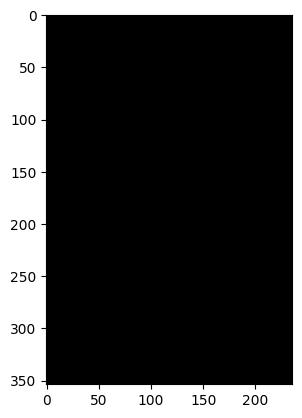

In [ ]:
import imageio as iio
import matplotlib.pyplot as plt
import numpy as np

# Write your function here!
def edge_detect(image_file: str) -> None:

    image = iio.imread(image_file, mode="L")
    image_h, image_w = image.shape
    # Define the kernel
    
    # I chose the laplacian kernel because it is good at highlighting areas where pixel values sharply shift.
    kernel = np.array([
        [0,-1,0],
        [-1,4,-1],
        [0,-1,0]
    ])
    # Apply the kernel
    result = np.zeros((image_h, image_w))
    np.pad(image, 1, mode='edge')
    for ih in range(image_h):
        for iw in range(image_w):
            sum = np.sum(image[ih, iw]*kernel)
            if sum > 127: 
                result[ih, iw] = 255
            else:
                result[ih, iw] = 0
    
    # Normalize the image
    
    return result

    
duck = edge_detect("duck.jpg")
plt.imshow(duck, cmap="gray");